# Decision tree classification

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

import decision_tree

### Datasets

In [2]:
size = 300
r = 6
# blob 1
x = np.random.normal(4,2,(size))
y = np.random.normal(1,2,(size))
# blob 2
x2 = np.zeros(size)
y2 = np.zeros(size)
for i in range(size):
    x2[i] = 4+r*math.cos(2*math.pi*(i/size))# + 
    y2[i] = 1+r*math.sin(2*math.pi*(i/size))# + 
x2+=np.random.normal(0,1.5,(size))
y2+=np.random.normal(0,1.5,(size))

x = np.concatenate((x,x2))
y = np.concatenate((y,y2))
# add xy together 
X = np.hstack((x,y)).reshape(2,2*size).T
# reuse y for flags
y[:size] = 1
y[size:] = -1

In [3]:
# data
s = size//2
# test set
# blob 1
tx = np.random.normal(4,1.5,s)
ty = np.random.normal(1,1.5,s)
# blob 2
tx2 = np.zeros(s)
ty2 = np.zeros(s)
for i in range(s):
    tx2[i] = 4+r*math.cos(2*math.pi*(i/s))# + 
    ty2[i] = 1+r*math.sin(2*math.pi*(i/s))# + 
tx2+=np.random.normal(0,1,s)
ty2+=np.random.normal(0,1,s)

tx = np.concatenate((tx,tx2))
ty = np.concatenate((ty,ty2))
# add xy together, add intercept 
tX = np.hstack((tx,ty)).reshape(2,size).T
# reuse y for flags
ty[:s] = 1
ty[s:] = -1

### Decision tree fitting

In [4]:
tree = decision_tree.DecisionTree()
tree.fit(X,y)

**Training set score**

In [5]:
tree.score(X,y)

0.9983333333333333

**Test set score**

In [6]:
tree.score(tX,ty)

0.93

**Decision boundary**

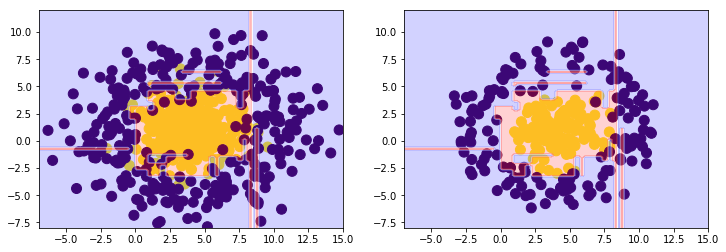

In [7]:
xxx = np.linspace(-7,15,100)
yyy = np.linspace(-8,12,100)
xx, yy = np.meshgrid(xxx,yyy)
Z = tree.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape((xx.shape))
fig, axes = plt.subplots(ncols=2,figsize=(12,4))
axes[0].scatter(X[:,0],X[:,1],c=y,s=100)
axes[1].scatter(tX[:,0],tX[:,1],c=ty,s=100)
axes[0].contourf(xx,yy,Z,alpha=0.2,cmap='bwr')
axes[1].contourf(xx,yy,Z,alpha=0.2,cmap='bwr')
plt.show()

Decision tress are prone to overfitting
<br>
A shallower tree might provide better generalizations

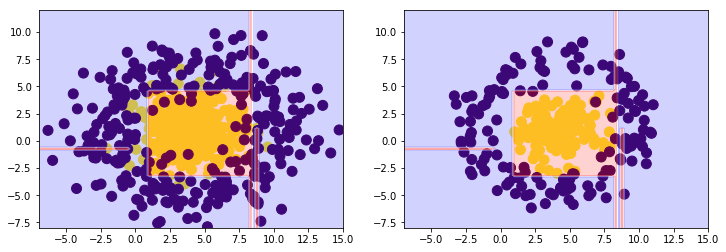

In [8]:
tree = decision_tree.DecisionTree(3)
tree.fit(X,y)

Z = tree.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape((xx.shape))
fig, axes = plt.subplots(ncols=2,figsize=(12,4))
axes[0].scatter(X[:,0],X[:,1],c=y,s=100)
axes[1].scatter(tX[:,0],tX[:,1],c=ty,s=100)
axes[0].contourf(xx,yy,Z,alpha=0.2,cmap='bwr')
axes[1].contourf(xx,yy,Z,alpha=0.2,cmap='bwr')
plt.show()

In [9]:
tree.score(tX,ty)

0.9466666666666667

Scoring is slightly higher than the default tree (`depth=15`), but performance will depend on the data

### Multiclass classification

In [15]:
size = 200
# blob 1
x = np.random.normal(2,1,(size))
y = np.random.normal(2,1,(size))
# blob 2
x = np.concatenate((x,np.random.normal(-3,1,(size))))
y = np.concatenate((y,np.random.normal(-2,1,(size))))
# blob 3
x = np.concatenate((x,np.random.normal(1,1,(size))))
y = np.concatenate((y,np.random.normal(-4,1,(size))))
# blob 4
x = np.concatenate((x,np.random.normal(-4,1,(size))))
y = np.concatenate((y,np.random.normal(4,1,(size))))

# add geometric xy together
X = np.hstack((x,y)).reshape(2,4*size).T

# reuse y for labels
    # indexes for easy labeling
i = [0,size,2*size,3*size,4*size]
y[i[0]:i[1]] = 0
y[i[1]:i[2]] = 1
y[i[2]:i[3]] = 2
y[i[3]:i[4]] = 3

In [16]:
size = 100
# blob 1
x = np.random.normal(2,1,(size))
ty = np.random.normal(2,1,(size))
# blob 2
x = np.concatenate((x,np.random.normal(-3,1,(size))))
ty = np.concatenate((ty,np.random.normal(-2,1,(size))))
# blob 3
x = np.concatenate((x,np.random.normal(1,1,(size))))
ty = np.concatenate((ty,np.random.normal(-4,1,(size))))
# blob 4
x = np.concatenate((x,np.random.normal(-4,1,(size))))
ty = np.concatenate((ty,np.random.normal(4,1,(size))))

# add xy together, add intercept 
tX = np.hstack((x,ty)).reshape(2,4*size).T
# reuse y for flags
    # indexes
i = [0,size,2*size,3*size,4*size]
ty[i[0]:i[1]] = 0
ty[i[1]:i[2]] = 1
ty[i[2]:i[3]] = 2
ty[i[3]:i[4]] = 3

In [17]:
tree = decision_tree.DecisionTree()
tree.fit(X,y)
tree.score(X,y)

1.0

In [18]:
tree.score(tX,ty)

0.9725

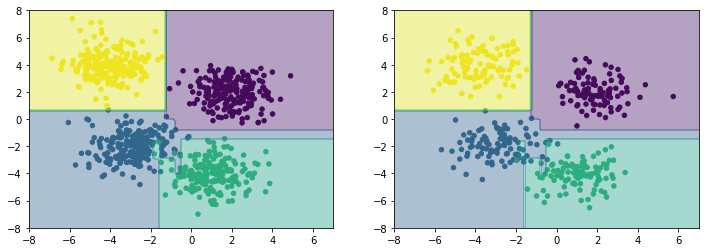

In [24]:
xxx = np.linspace(-8,7,100)
yyy = np.linspace(-8,8,100)
xx, yy = np.meshgrid(xxx,yyy)
Z = tree.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape((xx.shape))
fig, axes = plt.subplots(ncols=2,figsize=(12,4))
axes[0].scatter(X[:,0],X[:,1],c=y,s=20)
axes[1].scatter(tX[:,0],tX[:,1],c=ty,s=20)
axes[0].contourf(xx,yy,Z,alpha=0.4)
axes[1].contourf(xx,yy,Z,alpha=0.4)
plt.show()

### Options

User can observe the criteria manually
<br>
the criteria are stored as tuples of (column, threshold) where the left branch is `True` for `X[column]<=threshold` (right branch is `False`)

In [25]:
tree.head.criterion

(1, 0.005239688927173525)

Criterion for left branch

In [26]:
tree.head.left.criterion

(0, -0.8410366643790126)

User can view the prediction of a terminal branch (values are not defined for non-terminal branches)
<br>
`yle` is for the left leaf and `ygt` is for the right leaf

In [27]:
tree.head.left.right.right.yle

1

**Labels can be of any type**
<br>
Tree internally converts them to sequential intergers

In [28]:
# update labels to strings
size = 200 
i = [0,size,2*size,3*size,4*size]
y = y.astype(str)
y[i[0]:i[1]] = 'bears'
y[i[1]:i[2]] = 'tigers'
y[i[2]:i[3]] = 'iguanas'
y[i[3]:i[4]] = 'parrots'

size = 100
i = [0,size,2*size,3*size,4*size]
ty = ty.astype(str)
ty[i[0]:i[1]] = 'bears'
ty[i[1]:i[2]] = 'tigers'
ty[i[2]:i[3]] = 'iguanas'
ty[i[3]:i[4]] = 'parrots'

In [29]:
tree.fit(X,y)
mask = np.random.choice(np.arange(len(tX)),30)
tree.predict(tX[mask])

array(['parrots', 'iguanas', 'tigers', 'tigers', 'bears', 'iguanas',
       'parrots', 'tigers', 'bears', 'tigers', 'bears', 'tigers', 'bears',
       'bears', 'iguanas', 'iguanas', 'bears', 'parrots', 'bears',
       'tigers', 'iguanas', 'iguanas', 'iguanas', 'parrots', 'bears',
       'iguanas', 'iguanas', 'parrots', 'iguanas', 'parrots'],
      dtype='<U32')

In [30]:
tree.score(tX[mask],ty[mask])

0.9666666666666667